In [83]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [84]:
# characteristic equation
# U'' = T/mu*Uxx - 2*s0*U' + s1*U'xx + E*I*Uxxxx

L = 0.45    # m
T = 50      # N
mu = 0.03   # kg/m
s0 = 0.01      # 0.1
s1 = -0.01      # 0.1
E = 0       # PMLFIXME need nominal value
I = 1       # PMLFIXME need nominal value
N = 16
x = np.linspace(0,L,num=N).reshape(N,1)
k = np.linspace(0,N-1,num=N).reshape(N,1)



In [85]:
u0 = np.sin(np.pi*x/L)
u0hat = np.fft.fft(u0)
g  = 2*np.pi*k/N
g2 = g*g
a  = 2*s0 + g2*s1
b  = g2*T/mu - g2*g2*E*I
p  = -a/2
q  = np.sqrt(a*a/4 - b + 0.j)   
def bridge(t): return np.average(-u0hat/q*np.exp(p*t)*(p*np.cosh(q*t) - q*np.sinh(q*t)))


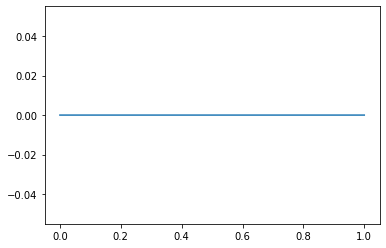

In [102]:
f = 44100  # hz
T = 1      # s
samples = int(T*f)
t = np.linspace(0,T,samples)
y = []
for i,ti in enumerate(t):
    y.append(np.real(bridge(ti)))

# print(bridge(0))
# print(bridge(0.1))
# print(bridge(0.2))
# print(t[int(0.1/f)])
# print(bridge(t[int(0.1/f)]))
# print(y)
fig = plt.figure()
plt.plot(t,y)
plt.show()
